<a href="https://colab.research.google.com/github/Emmyeka1/Coursera_Capstone/blob/main/Week_3_Assignment_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the Week 3 Assignment for the IBM Applied Data Science Coursera-Capstone.**

## For this assignment, we are required to explore and cluster the neighbourhoods in Toronto. This Assignment is in 3 parts and I will be using one notebook for the 3 parts. 

# **Part 1**

## Build a dataframe of the postal code of each neighbourhood along with the borough name and neighbourhood name in Toronto.

## a. Import Libraries.

In [1]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd
print("Libraries imported.")

Libraries imported.


## b. Scrap  Data from Wikipedia page into a DataFram using BeautifulSoup package.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
data.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


## c. Drop cells with Borough that is **Not assigned**.

In [4]:
raw_data_selected = data[data['Borough'] != 'Not assigned']

In [5]:
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal Code'], as_index=False).agg(','.join)

In [6]:
raw_data_selected.head()

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


## d. Group cells that has a Borough but a **Not assigned** Neighbourhood.

In [7]:
raw_data_selected['Neighbourhood'] = np.where(raw_data_selected['Neighbourhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighbourhood'])

In [8]:
raw_data_selected['Neighbourhood'].head()

0                        Lawrence Park
1                     Davisville North
2    North Toronto West, Lawrence Park
3                           Davisville
4          Moore Park, Summerhill East
Name: Neighbourhood, dtype: object

## e. Print the number of rows of the cleaned DataFrame.

In [9]:
raw_data_selected.shape

(103, 3)

In [10]:

raw_data_selected.to_csv('Week_3Coursera_CapstoneCanadaPre.csv')

# **Part 2**

## Use the Geocoder package or the csv file to create a DataFrame.

## a. Import the geographical coordinates of the neighborhoods.

In [11]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [12]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## b. Get the latitude and longitude coordinates of each neighbourhood in a merged data.

In [13]:
geospatial_data.columns = ['Postal Code', 'Latitude', 'Longitude']

In [14]:
geospatial_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [15]:
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postal Code')

In [16]:
merged_data.head(12)

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160
5,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936
7,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529


# **Part 3**

## Explore, cluster and analyse neighbourhoods in Toronto.

## a. Install geopandas library.

In [17]:
!pip install geopandas

## b. Import additional libraries.

In [18]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
print("Additional libraries imported.")

Additional libraries imported.


## c. Get the latitude and longitude coordinates of Central Toronto Borough.

In [19]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [20]:
merged_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [21]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [22]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [23]:
gdf.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.72802 -79.38879)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.71275 -79.39020)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.71538 -79.40568)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.70432 -79.38879)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.68957 -79.38316)


## d. Generate maps to visualize Central Toronto Borough neighborhoods and how they cluster together.

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


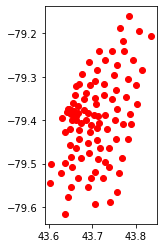

In [24]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()